<a href="https://colab.research.google.com/github/Abhishek500/Colab/blob/master/Assignment%2010/Assingment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [3]:
## Mounting the image from google drive.
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [4]:
cd '/content/gdrive/My Drive/EVA'

/content/gdrive/My Drive/EVA


In [0]:
img1 = cv2.imread("guitar.jpg",cv2.IMREAD_UNCHANGED)
img1 = cv2.resize(img1, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)

788


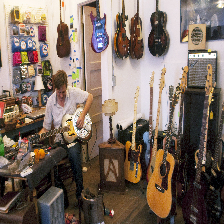

In [17]:
## Pre trained weights of VGG16 for imagenet
model = VGG16(weights="imagenet")
preds1 = model.predict(x1)
class_idx1 = np.argmax(preds1[0])
print(class_idx1)
class_output1 = model.output[:, class_idx1]
cv2_imshow(img1)

788 is shoe store class

(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


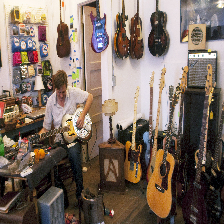

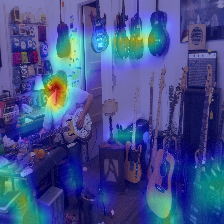

In [15]:
## Using gradcam on one layer before the one done in session
second_last_conv_layer = model.get_layer("block5_conv2")

grads1 = K.gradients(class_output1, second_last_conv_layer.output)[0]
print(grads1.shape)
pooled_grads1 = K.mean(grads1, axis=(0, 1, 2))
print(pooled_grads1.shape)
iterate1 = K.function([model.input], [pooled_grads1, second_last_conv_layer.output[0]])

pooled_grads_value1, conv_layer_output_value1 = iterate1([x1])

for i in range(512):
  conv_layer_output_value1[:, :, i] *= pooled_grads_value1[i]
  
  
heatmap1 = np.mean(conv_layer_output_value1, axis = -1)
print(conv_layer_output_value1.shape)
print(heatmap1.shape)
heatmap1 = np.maximum(heatmap1, 0)
heatmap1 /= np.max(heatmap1)
heatmap1 = cv2.resize(heatmap1, (img1.shape[1], img1.shape[0]))
heatmap1 = np.uint8(255 * heatmap1)
heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)
superimposed_img1 = cv2.addWeighted(img1, 0.5, heatmap1, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(img1)
cv2_imshow(superimposed_img1)

(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


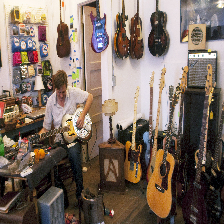

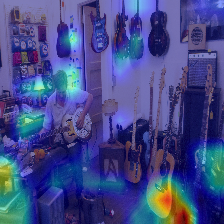

In [16]:
#### Using gradcam on two layer before the one done in session

third_last_conv_layer = model.get_layer("block5_conv1")

grads2 = K.gradients(class_output1, third_last_conv_layer.output)[0]
print(grads2.shape)
pooled_grads2 = K.mean(grads2, axis=(0, 1, 2))
print(pooled_grads2.shape)
iterate2 = K.function([model.input], [pooled_grads2, third_last_conv_layer.output[0]])

pooled_grads_value2, conv_layer_output_value2 = iterate2([x1])

for i in range(512):
  conv_layer_output_value2[:, :, i] *= pooled_grads_value2[i]
  
  
heatmap2 = np.mean(conv_layer_output_value2, axis = -1)
print(conv_layer_output_value2.shape)
print(heatmap2.shape)
heatmap2 = np.maximum(heatmap2, 0)
heatmap2 /= np.max(heatmap2)


heatmap2 = cv2.resize(heatmap2, (img1.shape[1], img1.shape[0]))
heatmap2 = np.uint8(255 * heatmap2)
heatmap2 = cv2.applyColorMap(heatmap2, cv2.COLORMAP_JET)
superimposed_img2 = cv2.addWeighted(img1, 0.5, heatmap2, 0.5, 0)
cv2_imshow(img1)
cv2_imshow(superimposed_img2)

# **Part 2**, implementing GradCam on Tony stark image

In [0]:
img = cv2.imread("Tony_stark.jpg",cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
## Pre trained weights of VGG16 for imagenet
model = VGG16(weights="imagenet")

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]


837


837 is also the sunglasses class index in imagenet

In [0]:
## Using gradcam on one layer before the one done in session
second_last_conv_layer = model.get_layer("block5_conv2")

grads = K.gradients(class_output, second_last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, second_last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)
(512,)


In [0]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


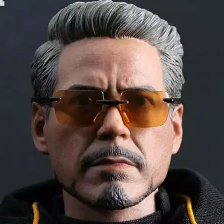

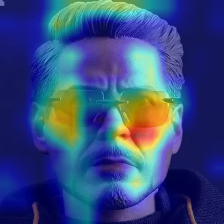

In [0]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(superimposed_img)

(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


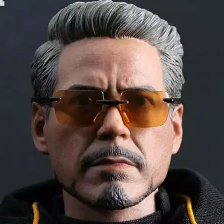

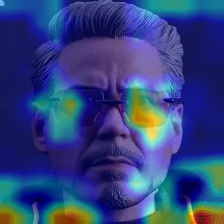

In [0]:
#### Using gradcam on two layer before the one done in session

third_last_conv_layer = model.get_layer("block5_conv1")

grads3 = K.gradients(class_output, third_last_conv_layer.output)[0]
print(grads3.shape)
pooled_grads3 = K.mean(grads3, axis=(0, 1, 2))
print(pooled_grads3.shape)
iterate3 = K.function([model.input], [pooled_grads3, third_last_conv_layer.output[0]])

pooled_grads_value3, conv_layer_output_value3 = iterate([x])

for i in range(512):
  conv_layer_output_value3[:, :, i] *= pooled_grads_value3[i]
  
  
heatmap3 = np.mean(conv_layer_output_value3, axis = -1)
print(conv_layer_output_value3.shape)
print(heatmap3.shape)
heatmap3 = np.maximum(heatmap3, 0)
heatmap3 /= np.max(heatmap3)


heatmap3 = cv2.resize(heatmap3, (img.shape[1], img.shape[0]))
heatmap3 = np.uint8(255 * heatmap3)
heatmap3 = cv2.applyColorMap(heatmap3, cv2.COLORMAP_JET)
superimposed_img3 = cv2.addWeighted(img, 0.5, heatmap3, 0.5, 0)
cv2_imshow(img)
cv2_imshow(superimposed_img3)